# Simulate data based on two norms model

In [15]:
#Import some libraries

import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from inequalityaversion import two_norms_model


### Make choices for some settings

colors, axes, some simulation settings

In [16]:
#Set wd
if sys.platform == 'win32':
    base_dir = 'P:/3014018.13/experiment_3_DG_UG'
elif sys.platform == 'linux':
    base_dir = '/project/3014018.13/experiment_3_DG_UG'
else:
    base_dir = '/Users/rhmhuijsmans/Desktop/mac_Harvard/Donders/experiment_3_DG_UG/UGDGD/'


plotdir = '%s/plots/' % base_dir

if not os.path.exists(plotdir):
    os.makedirs(plotdir)
    
#Set some colors
twocolors = ["#0093BA", "#5E9D45"]
threecolors= ["#ba1319", "#f36f21", "#fff100"]  
sevencolors = ['#C70039','#FF5733', '#FF8D1A','#FFC300', '#EDDD53', '#ADD45C','#57C785']
fourcolors = ['#C70039','#FF8D1A','#EDDD53','#57C785']

#I don't like it continuously overwriting 
saveFigs = False

#Settings for simulations
WD = [0.19,0.75,3]
WR = [0.19,0.75,3]
thetaMin = 0; phiMin = 0; thetaMax = 0.5; phiMax= 1;
thetaRange = [thetaMin,thetaMax]
phiRange = [phiMin,phiMax]
thetaPlotRange = [thetaMin-0.1,thetaMax + 0.1]
thetaPlotRange = [phiMin-0.1,phiMax + 0.1]
choicePlotRange = [-0.1,1.1]


### Simulate the data

In [25]:
   
precision = 10
theta = np.arange(thetaMin,thetaMax+.001,thetaMax/precision)
phi = np.arange(phiMin,phiMax+.001,phiMax/precision)

choice = np.zeros((len(WD),len(WR),len(phi),5,len(theta)))
heatMap = np.zeros((len(WD),len(WR),len(theta),len(phi)))

choiceIA = np.zeros((len(WD),len(WR),4,len(phi)))


for WD_n in range(0,len(WD)):    
    for WR_n in range(0,len(WR)):    
        for i in range(0,len(theta)):    
            for j in range(0,len(phi)):  
                heatMap[WD_n,WR_n,i,j] = two_norms_model(WD[WD_n], WR[WR_n], theta[i], phi[j])
                choice[WD_n,WR_n,i,0,j] = WD[WD_n]
                choice[WD_n,WR_n,i,1,j] = WR[BP2n]
                choice[WD_n,WR_n,i,2,j] = phi[j]
                choice[WD_n,WR_n,i,3,j] = theta[i]
                choice[WD_n,WR_n,i,4,j] = two_norms_model(WD[WD_n], WR[WR_n], theta[j], phi[i])


#    pd.DataFrame(choice).to_csv(os.path.join(base_dir,
#                            'analyses/results/Simulations_inequity_maximizer.csv'))     




### Make a nice heatmap

/Users/rhmhuijsmans/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


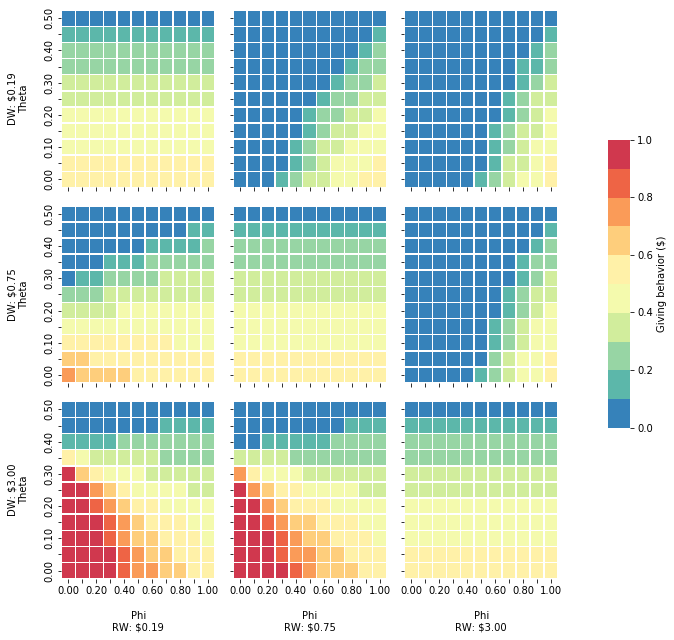

In [26]:
ncols = 10
sns.set_palette('Spectral',ncols)
colorMap = sns.color_palette()[0:ncols]
colorMap = colorMap[::-1]
#Show investment in heatmaps
fig1, axs = plt.subplots(len(WD),len(WR), figsize = (10,10))  
cbar_ax = fig1.add_axes([.85, .3, .03, .4])

num_ticks = 5
# Make nice axis ticks
axXticks = np.arange(0, phiMax+0.001, phiMax/10)
axYticks = np.arange(0, thetaMax+0.001, thetaMax/10)
axListX = ['']*((num_ticks*2)+1)
axListY = ['']*((num_ticks*2)+1)
yTicks = ['%.2f' %x for x in axYticks]
xTicks = ['%.2f' %x for x in axXticks]
axListX[::2] = xTicks[::2]
axListY[::2] = yTicks[::2]

for WDn in range(0,len(WD)):    
    for WRn in range(0,len(WR)):
        b = sns.heatmap(heatMap[WDn,WRn], vmin=0, vmax=1, yticklabels = axListY,
                        xticklabels =  axListX,
                    linewidth=0.5, ax = axs[WDn,WRn], cmap=colorMap,
                    cbar = WDn + WRn == 0,
                    cbar_ax=None if WDn+WRn else cbar_ax,
                    cbar_kws={'label': 'Giving behavior ($)'})

        b.set_yticks(np.arange(11)+0.5)
        b.set_yticklabels(axListY, va = 'center')

        b.invert_yaxis()            
        if WRn == 0:
            b.set_ylabel('DW: $%.2f\nTheta\n'%WD[WDn])
        if WDn == (len(WD)-1):
            b.set_xlabel('\nPhi\nRW: $%.2f'%WR[WRn])  
        if (WRn != 0):
            b.set_yticklabels([]) 
        if (WDn != (len(WD)-1)):
            b.set_xticklabels([]) 
fig1.tight_layout(rect=[0, 0, .8, 0.9])

figname = '%s/Distributors_maximizer_heatmap_NM' % plotdir
if saveFigs:
    plt.savefig('%s.png' % figname, bbox_inches='tight')
    plt.savefig('%s.eps' % figname, format='eps', bbox_inches='tight')
    



### Whoop pretty awesome!
On the diagonal no influence of Distributor/Receiver wealth. Here participants are equal. Top right is the situation where Distributor is less wealthy than the Receiver. Here the Distributor keeps more money (more blue) when phi is higher. Bottom left is where the distributor is richer, here they give away more to the Receiver when phi is higher.